In [1]:
#This project encompasses K-Nearest Neighbor and SVM that I did while completing my Masters at Georgetown.
#The project was completed during my Machine Learning II class and the questions asked are below. 
#I received a 93/100 on the assignment, I also have a written report that goes into more detail on my analysis

In [2]:
#Pre-process the data and prepare it for the running the following classification models (KNN and SVM). (15 points)
#Run a K-Nearest Neighbor model to build a predictive model for employees' attrition. Try out different values of k to find an optimal model. (25 points)  
#Run a Support Vector Machines model to build a predictive model for employees' attrition. Try out different model settings to find an optimal model. (25 points)
#Compare the best KNN and SVM models by their model evaluation metrics. Which is a better model and why? (10 points)
#What are the top 3 variables in your final model that will have a significant actionable impact in preventing employee attrition? Provide your recommendations to the management based on insights generated from the above model and summary of your findings. (15 points)

In [3]:
#Loading dataset and packages
library(caret)
library(class)
library(dplyr)
library(pROC)
library(ROSE)
library(fastDummies)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loaded ROSE 0.0-4




In [4]:
employee = read.csv("/kaggle/input/ml2-employee-data/EmployeeData.csv")

'data.frame':	4410 obs. of  18 variables:
 $ Age                    : int  51 31 32 38 32 46 28 29 31 25 ...
 $ Attrition              : chr  "No" "Yes" "No" "No" ...
 $ BusinessTravel         : chr  "Travel_Rarely" "Travel_Frequently" "Travel_Frequently" "Non-Travel" ...
 $ DistanceFromHome       : int  6 10 17 2 10 8 11 18 1 7 ...
 $ Education              : int  2 1 4 5 1 3 2 3 3 4 ...
 $ EmployeeID             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ JobLevel               : int  1 1 4 3 1 4 2 2 3 4 ...
 $ MaritalStatus          : chr  "Married" "Single" "Married" "Married" ...
 $ Income                 : int  131160 41890 193280 83210 23420 40710 58130 31430 20440 134640 ...
 $ NumCompaniesWorked     : int  1 0 1 3 4 3 2 2 0 1 ...
 $ StandardHours          : int  8 8 8 8 8 8 8 8 8 8 ...
 $ TotalWorkingYears      : int  1 6 5 13 9 28 5 10 10 6 ...
 $ TrainingTimesLastYear  : int  6 3 2 5 2 5 2 2 2 2 ...
 $ YearsAtCompan

      Age         Attrition         BusinessTravel     DistanceFromHome
 Min.   :18.00   Length:4410        Length:4410        Min.   : 1.000  
 1st Qu.:30.00   Class :character   Class :character   1st Qu.: 2.000  
 Median :36.00   Mode  :character   Mode  :character   Median : 7.000  
 Mean   :36.92                                         Mean   : 9.193  
 3rd Qu.:43.00                                         3rd Qu.:14.000  
 Max.   :60.00                                         Max.   :29.000  
                                                                       
   Education       EmployeeID      Gender             JobLevel    
 Min.   :1.000   Min.   :   1   Length:4410        Min.   :1.000  
 1st Qu.:2.000   1st Qu.:1103   Class :character   1st Qu.:1.000  
 Median :3.000   Median :2206   Mode  :character   Median :2.000  
 Mean   :2.913   Mean   :2206                      Mean   :2.064  
 3rd Qu.:4.000   3rd Qu.:3308                      3rd Qu.:3.000  
 Max.   :5.000   Max. 

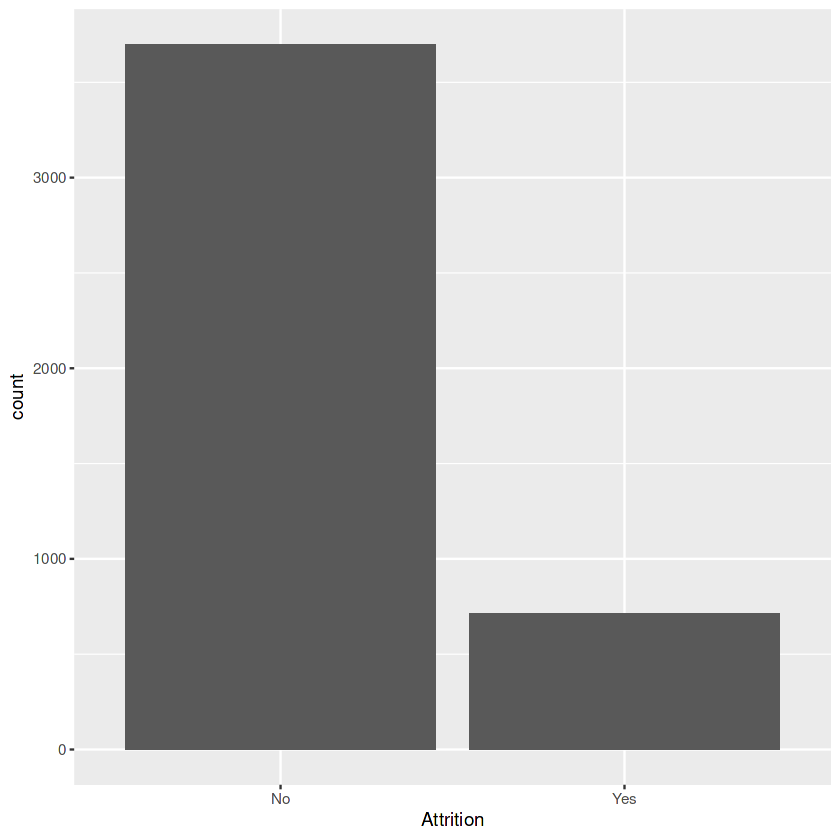

Age                        Attrition 
                               0                                0 
                DistanceFromHome                         JobLevel 
                               0                                0 
                   MaritalStatus                           Income 
                               0                                0 
              NumCompaniesWorked                TotalWorkingYears 
                              14                                4 
           TrainingTimesLastYear                   YearsAtCompany 
                               0                                0 
            YearsWithCurrManager          EnvironmentSatisfaction 
                               0                               14 
                 JobSatisfaction                      Education_1 
                              18                                0 
                     Education_2                      Education_3 
                               0                                0 
                     Education_4                      Education_5 
                               0                                0 
                   Gender_Female        BusinessTravel_Non_Travel 
                               0                                0 
BusinessTravel_Travel_Frequently     BusinessTravel_Travel_Rarely 
                               0                                0

Age                        Attrition 
                               0                                0 
                DistanceFromHome                         JobLevel 
                               0                                0 
                   MaritalStatus                           Income 
                               0                                0 
              NumCompaniesWorked                TotalWorkingYears 
                               5                                5 
           TrainingTimesLastYear                   YearsAtCompany 
                               0                                0 
            YearsWithCurrManager          EnvironmentSatisfaction 
                               0                               11 
                 JobSatisfaction                      Education_1 
                               2                                0 
                     Education_2                      Education_3 
                               0                                0 
                     Education_4                      Education_5 
                               0                                0 
                   Gender_Female        BusinessTravel_Non_Travel 
                               0                                0 
BusinessTravel_Travel_Frequently     BusinessTravel_Travel_Rarely 
                               0                                0

Age                        Attrition 
                               0                                0 
                DistanceFromHome                         JobLevel 
                               0                                0 
                   MaritalStatus                           Income 
                               0                                0 
              NumCompaniesWorked                TotalWorkingYears 
                               0                                0 
           TrainingTimesLastYear                   YearsAtCompany 
                               0                                0 
            YearsWithCurrManager          EnvironmentSatisfaction 
                               0                                0 
                 JobSatisfaction                      Education_1 
                               0                                0 
                     Education_2                      Education_3 
                               0                                0 
                     Education_4                      Education_5 
                               0                                0 
                   Gender_Female        BusinessTravel_Non_Travel 
                               0                                0 
BusinessTravel_Travel_Frequently     BusinessTravel_Travel_Rarely 
                               0                                0

Age                        Attrition 
                               0                                0 
                DistanceFromHome                         JobLevel 
                               0                                0 
                   MaritalStatus                           Income 
                               0                                0 
              NumCompaniesWorked                TotalWorkingYears 
                               0                                0 
           TrainingTimesLastYear                   YearsAtCompany 
                               0                                0 
            YearsWithCurrManager          EnvironmentSatisfaction 
                               0                                0 
                 JobSatisfaction                      Education_1 
                               0                                0 
                     Education_2                      Education_3 
                               0                                0 
                     Education_4                      Education_5 
                               0                                0 
                   Gender_Female        BusinessTravel_Non_Travel 
                               0                                0 
BusinessTravel_Travel_Frequently     BusinessTravel_Travel_Rarely 
                               0                                0

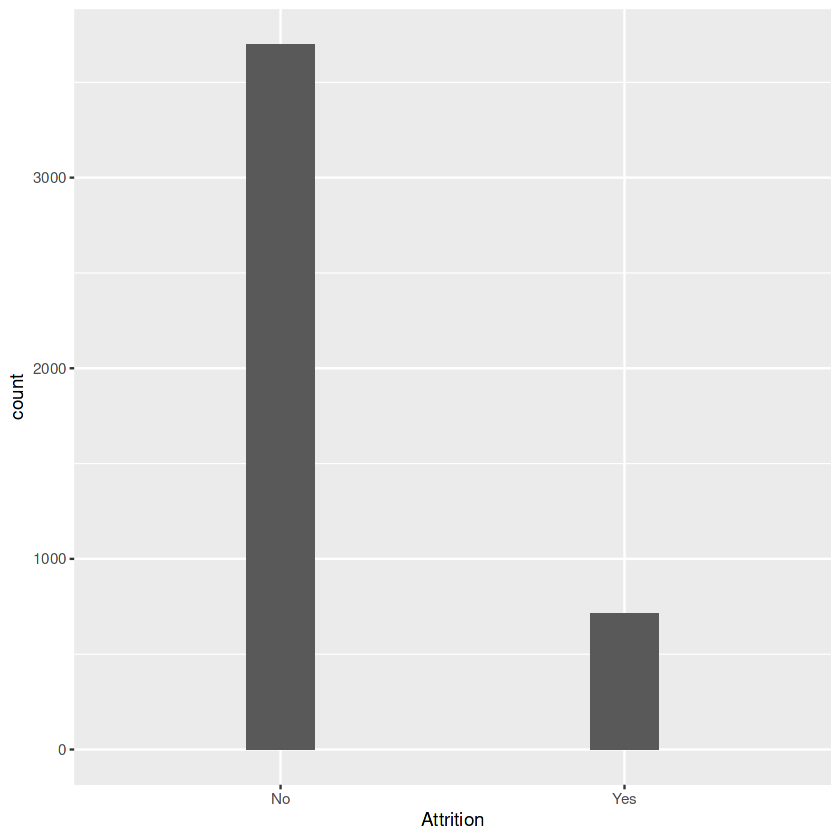

In [5]:
#Question 1
# Pre-process the data and prepare it for the running the following classification models (KNN and SVM). (15 points)

str(employee)
summary(employee)

#Visually seeing what attrition looks like
employee %>%
  ggplot(aes(x = Attrition)) + stat_count()

#Target variable needs to be factored (according to redwine example from week 1)
employee$Attrition = as.factor(employee$Attrition)

#Now we will plot the new variable to see if we can get a better ratio
employee %>%
  ggplot(aes(x = Attrition)) + geom_bar(width = 0.2) #Ratio appears to not have changed much SO THIS IS A HINT TO UNDERSAMPLE LATER


###NEED TO CREATE DUMMY VARIABLES HERE, GO LOOK AT LECTURE AROUND 28 MINUTES FOR MORE INFO, NEED FASTDUMMIES PACKAGE, SO GENDER AND EDUCATION WILL BE DUMMIED

employee = dummy_cols(employee, select_columns = c('Education','Gender', 'BusinessTravel'))


#Removing employeeID because it is only an identifier and not relevant to what we are trying to do, REMOVE ONE OF THE DUMMY VARIABLES FOR EACH ONE WE CREATED IN THIS AS WELL
employee = 
  employee %>%
  select(-c(EmployeeID, StandardHours, Gender, Gender_Male, Education, BusinessTravel))

employee = employee %>%
  rename("BusinessTravel_Non_Travel" = "BusinessTravel_Non-Travel")

###NOW WE WILL GET INTO PREPROCESSING THE DATA###
set.seed(123)
index = sample(nrow(employee), 0.7*nrow(employee))

train_employee = employee[index, ]
test_employee = employee[-index, ]

#We will now check for columns with missing values
sapply(train_employee, function(x){sum(is.na(x))})
sapply(test_employee, function(x){sum(is.na(x))})

#Replace missing values with either median or mean depending on if numerical or categorical, Have to use training data to replace values in test to not contaminate test
train_employee[is.na(train_employee$NumCompaniesWorked), 'NumCompaniesWorked'] = mean(train_employee$NumCompaniesWorked, na.rm = TRUE)
test_employee[is.na(test_employee$NumCompaniesWorked), 'NumCompaniesWorked'] = mean(train_employee$NumCompaniesWorked, na.rm = TRUE)

train_employee[is.na(train_employee$TotalWorkingYears), 'TotalWorkingYears'] = mean(train_employee$TotalWorkingYears, na.rm = TRUE)
test_employee[is.na(test_employee$TotalWorkingYears), 'TotalWorkingYears'] = mean(train_employee$TotalWorkingYears, na.rm = TRUE)

#Used median for this one because it is categorical (Not sure if thats the right logic)
train_employee[is.na(train_employee$EnvironmentSatisfaction), 'EnvironmentSatisfaction'] = median(train_employee$EnvironmentSatisfaction, na.rm = TRUE)
test_employee[is.na(test_employee$EnvironmentSatisfaction), 'EnvironmentSatisfaction'] = median(train_employee$EnvironmentSatisfaction, na.rm = TRUE)

train_employee[is.na(train_employee$JobSatisfaction), 'JobSatisfaction'] = median(train_employee$JobSatisfaction, na.rm = TRUE)
test_employee[is.na(test_employee$JobSatisfaction), 'JobSatisfaction'] = median(train_employee$JobSatisfaction, na.rm = TRUE)

#Checking for missing data now#
sapply(train_employee, function(x){sum(is.na(x))})
sapply(test_employee, function(x){sum(is.na(x))})

#Factoring the data#
train_employee$MaritalStatus = as.numeric(as.integer(as.factor(train_employee$MaritalStatus)))


test_employee$MaritalStatus = as.numeric(as.integer(as.factor(test_employee$MaritalStatus)))

In [6]:
###WE NEED TO BALANCE THE DATA FIRST BY DOING AN UNDERSAMPLE OR ELSE OUR CONFUSION MATRIX IS GOING TO BE MESSED UP DOWN THE ROAD WITH A HIGH 
### SPECIFICITY AND A LOW SENSITIVITY###
train_employee = ovun.sample(formula = Attrition ~ ., data = train_employee, method = "under", p = 0.5, seed = 123)$data
table(train_employee$Attrition)

###NOW THE DATA LOOKS MORE BALANCED###

#Now we scale data to get started on our KNN#
#WE DO NOT WANT TO SCALE THE ATTRITION VARIABLE BECUASE THAT IS OUR TARGET VARIABLE
###Running into error code because it wants x to be numeric for the formulas below###
train_x = scale(train_employee[, -2])
test_x = scale(test_employee[, -2],center = apply(train_employee[,-2], 2, mean),
                                scale = apply(train_employee[,-2], 2, sd))

train_y = train_employee$Attrition
test_y = test_employee$Attrition


#For starters we use this rule of thumb for k
k = sqrt(nrow(train_x)) 
k


 No Yes 
488 496 

[1] 31.36877

k-Nearest Neighbors 

984 samples
 21 predictor
  2 classes: 'No', 'Yes' 

Pre-processing: centered (21), scaled (21) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 885, 885, 887, 886, 885, 886, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.6381076  0.2752719
   7  0.6593725  0.3179781
   9  0.6441166  0.2875533
  11  0.6400560  0.2795208
  13  0.6462206  0.2921157
  15  0.6390556  0.2775448
  17  0.6277478  0.2549092
  19  0.6410449  0.2816307
  21  0.6186460  0.2368132
  23  0.6288303  0.2573435
  25  0.6278612  0.2552912
  27  0.6430952  0.2855813
  29  0.6381284  0.2757656
  31  0.6482294  0.2958849
  33  0.6329744  0.2652902
  35  0.6319849  0.2632680
  37  0.6502807  0.3000535
  39  0.6563308  0.3121055
  41  0.6471779  0.2936238
  43  0.6451991  0.2895231

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 7.

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  720  62
       Yes 388 153
                                          
               Accuracy : 0.6599          
                 95% CI : (0.6336, 0.6854)
    No Information Rate : 0.8375          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2244          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7116          
            Specificity : 0.6498          
         Pos Pred Value : 0.2828          
         Neg Pred Value : 0.9207          
             Prevalence : 0.1625          
         Detection Rate : 0.1156          
   Detection Prevalence : 0.4089          
      Balanced Accuracy : 0.6807          
                                          
       'Positive' Class : Yes             
                              

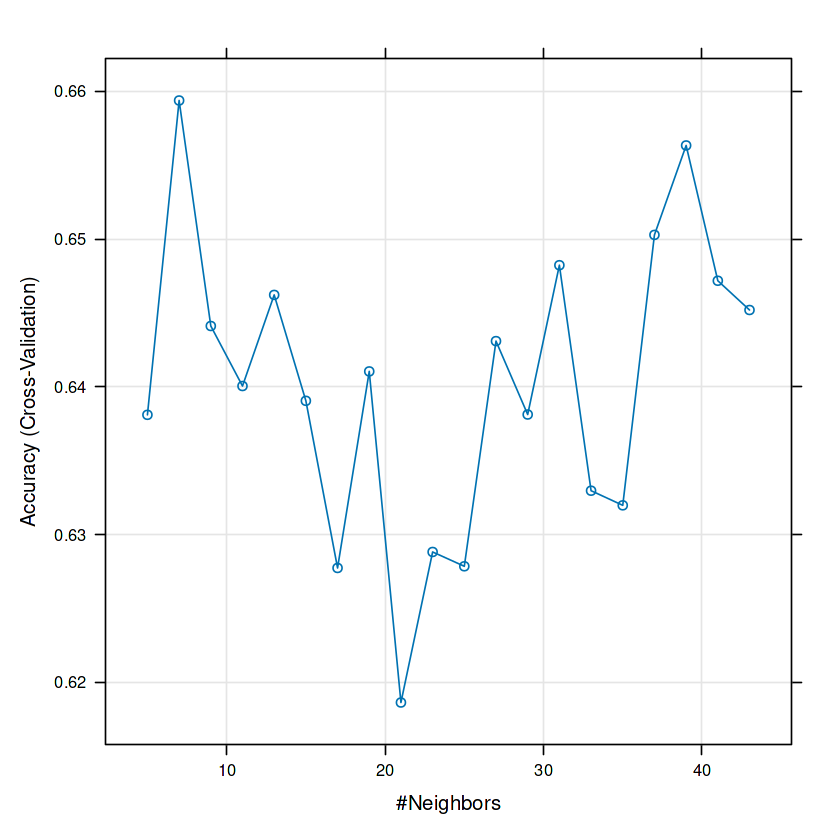

In [7]:
#Using caret package
# Specify 10-fold cross validation
ctrl = trainControl(method="cv", number=10)


# CV KNN model
# Here we're using "knn" based on the CV parameters that we set earlier
# tuneLength=20 means the function automatically runs/tests for 20 different values of k
# We can either use already-scaled datasets as inputs or scale the original train/test datasets 
model_a = train(
  Attrition ~ ., data = train_employee,
  method = "knn", trControl = ctrl, 
  preProcess = c("center","scale"),
  tuneLength = 20)

#Plot the results, looks like 31 or 32 for k might be the best one to use, 35 Looks like it will work better accoriding to graph
model_a
plot(model_a)

#To get the predicted class/category for each data in test
#Note: When using the train() function from "caret" package, 
# the model automatically chooses the best value of k to use in prediction

model_a_pred = predict(model_a, test_employee, type="raw")


#To get the predicted probability of belonging to each class/category
model_a_probs = predict(model_a, test_employee, type="prob")[, 2]

#Make sure you under/over sample if your specificity and sensitivity is out of wack
confusionMatrix(data = model_a_pred, reference = test_employee$Attrition, positive = "Yes")

In [8]:
###NOT USING CARET PACKAGE###
#The value of k is 31.37, so we'll use 32 for the k. 
#We use function knn() from the package 'class' to run the model
#For KNN, you need not do the prediction: prediction is automatically indicated in modeling
#However, scaling is not. That's why we scaled the data in lines 78-80 

#We set a random seed before we apply knn() because if several observations are tied as nearest neighbors, 
#then R will randomly break the tie. 
#Therefore, a seed must be set in order to ensure reproducibility of results.

set.seed(123)
model_knn = knn(train = train_x, test = test_x, cl = train_y, k = 32)
model_knn

#MODEL EVALUATION#
#Ran confusion matrix and specificity was too high and sensitivity is too low may need to under sample. AFTER UNDER SAMPLING THIS LOOKS MORE BETTER
confusionMatrix(data = model_knn, reference = test_y, positive = "Yes")

#Obtaining the predicted probability of belonging to each class/category
#NA'S WERE INTRODUCED WHEN I RAN THIS!!!
set.seed(123)
model_knn_probs = attributes(knn(train = train_x, test = test_x, cl = train_y, k = 32, prob = TRUE))$prob

#Evalaute the model
confusionMatrix(data = model_knn, 
                reference = test_y,
                positive = "Yes")

[1] Yes No  Yes No  No  No  No  No  No  No  Yes No  Yes No  No  No  Yes No 
  [19] No  Yes No  No  Yes No  Yes No  No  No  No  Yes No  No  No  No  No  No 
  [37] Yes Yes Yes No  Yes Yes Yes No  Yes Yes No  No  Yes No  No  Yes No  No 
  [55] No  No  Yes No  No  No  No  No  No  No  No  No  Yes Yes No  No  No  Yes
  [73] Yes Yes No  No  No  Yes Yes No  Yes No  Yes No  Yes Yes Yes Yes No  No 
  [91] No  No  No  No  Yes No  Yes No  No  Yes No  Yes No  No  No  No  No  Yes
 [109] No  Yes Yes No  Yes No  Yes No  No  Yes Yes No  Yes No  No  Yes Yes No 
 [127] Yes No  No  Yes Yes No  No  No  Yes Yes No  No  Yes Yes No  No  No  Yes
 [145] No  No  No  Yes No  Yes Yes Yes No  No  No  Yes No  No  No  Yes Yes Yes
 [163] No  No  No  No  No  Yes Yes No  No  Yes No  No  Yes No  Yes No  No  Yes
 [181] No  No  No  No  Yes Yes Yes No  Yes No  No  No  Yes Yes No  No  Yes No 
 [199] No  No  No  Yes Yes Yes No  No  Yes No  Yes Yes No  No  No  Yes Yes No 
 [217] No  Yes Yes No  No  No  Yes Yes No  No  No  No  No  Yes Yes No  No  Yes
 [235] No  Yes No  No  Yes Yes No  Yes Yes Yes Yes No  No  Yes No  Yes Yes No 
 [253] Yes No  Yes Yes No  No  Yes No  No  No  Yes No  Yes No  No  No  No  No 
 [271] Yes Yes No  No  No  Yes Yes No  Yes Yes Yes No  Yes No  No  Yes Yes Yes
 [289] Yes Yes No  No  Yes No  No  No  No  Yes Yes No  Yes Yes No  No  Yes Yes
 [307] No  No  No  Yes Yes No  No  Yes Yes Yes Yes No  No  Yes Yes No  Yes No 
 [325] Yes No  No  Yes Yes Yes No  No  No  Yes Yes No  No  Yes Yes Yes Yes Yes
 [343] No  No  No  No  No  No  No  No  No  No  No  Yes No  No  No  Yes Yes Yes
 [361] No  No  Yes No  Yes Yes Yes Yes No  No  No  Yes No  No  No  No  No  Yes
 [379] No  No  Yes Yes No  Yes Yes Yes No  Yes No  No  Yes No  Yes No  Yes Yes
 [397] No  No  Yes No  Yes Yes No  No  Yes Yes No  No  Yes No  No  No  No  No 
 [415] Yes Yes No  Yes No  No  No  No  Yes Yes No  No  No  No  No  No  Yes No 
 [433] No  Yes No  Yes No  No  No  Yes Yes No  Yes Yes No  No  Yes Yes No  No 
 [451] No  Yes Yes Yes No  Yes Yes Yes Yes Yes No  No  No  Yes No  No  No  No 
 [469] Yes No  No  No  No  No  No  No  No  Yes Yes Yes Yes No  No  No  Yes Yes
 [487] No  Yes No  No  Yes No  Yes No  No  No  No  Yes No  No  No  No  No  Yes
 [505] Yes No  Yes Yes No  No  No  No  Yes Yes No  Yes No  No  No  No  Yes No 
 [523] No  Yes No  No  No  Yes No  No  No  No  No  No  Yes Yes Yes Yes No  Yes
 [541] No  No  Yes No  Yes Yes No  Yes No  No  Yes Yes Yes No  No  Yes Yes Yes
 [559] No  No  Yes No  No  Yes No  Yes No  Yes Yes No  Yes Yes Yes No  Yes Yes
 [577] No  No  No  Yes Yes Yes Yes Yes No  No  No  No  No  No  No  No  No  Yes
 [595] Yes No  No  No  No  No  No  No  No  No  No  Yes Yes No  Yes No  No  Yes
 [613] No  No  No  No  No  No  Yes Yes No  No  Yes Yes No  Yes No  Yes Yes No 
 [631] No  No  No  Yes No  Yes Yes No  Yes No  Yes No  Yes Yes No  No  Yes Yes
 [649] Yes No  Yes No  No  Yes No  No  No  No  No  No  No  Yes Yes No  No  No 
 [667] No  Yes Yes No  No  No  Yes No  Yes Yes Yes Yes No  No  No  No  Yes No 
 [685] No  No  No  Yes Yes No  Yes No  No  No  Yes No  No  No  No  No  No  Yes
 [703] Yes Yes Yes No  Yes Yes Yes Yes No  No  No  Yes No  No  Yes No  Yes Yes
 [721] Yes Yes No  No  No  No  No  No  No  No  No  No  Yes No  Yes No  Yes No 
 [739] Yes No  No  No  Yes Yes Yes No  Yes No  Yes Yes Yes No  No  Yes No  Yes
 [757] Yes No  No  Yes No  Yes No  No  No  Yes Yes Yes Yes Yes Yes Yes Yes No 
 [775] No  Yes No  Yes Yes No  Yes Yes No  No  Yes No  No  No  Yes Yes Yes Yes
 [793] No  Yes No  No  No  No  No  No  No  Yes No  No  Yes Yes Yes No  Yes No 
 [811] No  No  Yes No  No  Yes No  Yes No  No  No  No  No  Yes No  Yes No  No 
 [829] No  Yes No  No  Yes No  No  Yes Yes Yes No  No  No  No  No  No  No  No 
 [847] No  Yes Yes No  No  No  Yes Yes No  Yes Yes No  Yes No  Yes No  No  No 
 [865] Yes Yes No  No  Yes Yes No  Yes No  No  No  Yes Yes No  Yes No  Yes No 
 [883] No  No  Yes No  No  Yes Yes No  Yes No  No  No  No  Yes Yes Yes Yes No 
 [901] Yes Yes Yes No  No  No  No  No  No  Yes Yes Ye

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  702  70
       Yes 406 145
                                          
               Accuracy : 0.6402          
                 95% CI : (0.6137, 0.6661)
    No Information Rate : 0.8375          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.189           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6744          
            Specificity : 0.6336          
         Pos Pred Value : 0.2632          
         Neg Pred Value : 0.9093          
             Prevalence : 0.1625          
         Detection Rate : 0.1096          
   Detection Prevalence : 0.4165          
      Balanced Accuracy : 0.6540          
                                          
       'Positive' Class : Yes             
                              

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  702  70
       Yes 406 145
                                          
               Accuracy : 0.6402          
                 95% CI : (0.6137, 0.6661)
    No Information Rate : 0.8375          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.189           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6744          
            Specificity : 0.6336          
         Pos Pred Value : 0.2632          
         Neg Pred Value : 0.9093          
             Prevalence : 0.1625          
         Detection Rate : 0.1096          
   Detection Prevalence : 0.4165          
      Balanced Accuracy : 0.6540          
                                          
       'Positive' Class : Yes             
                              

Setting levels: control = No, case = Yes

Setting direction: controls < cases

Setting levels: control = No, case = Yes

Setting direction: controls < cases



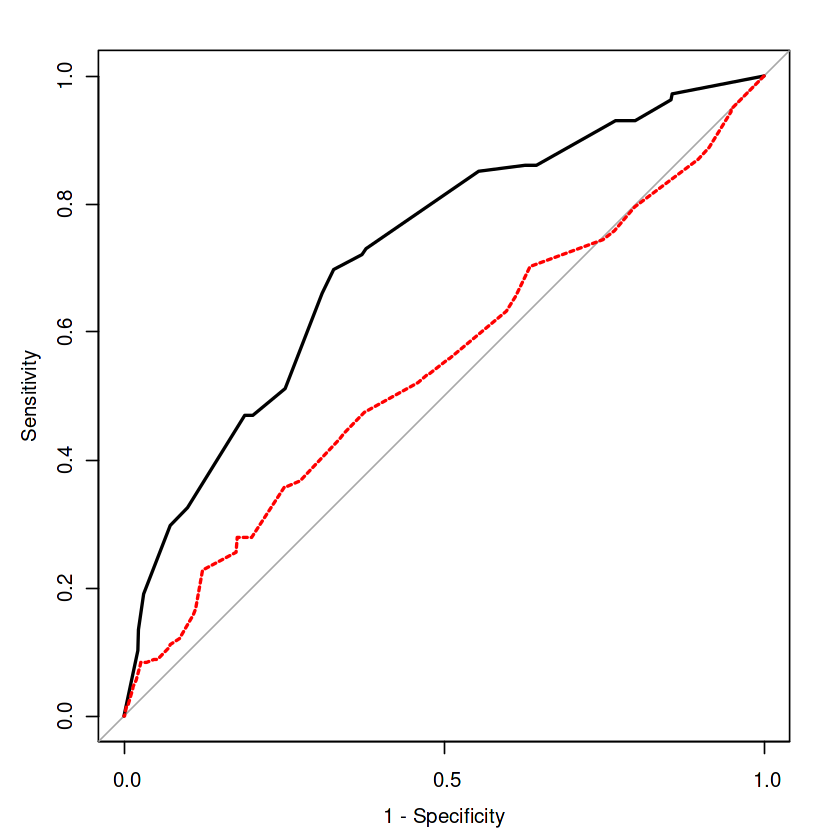

In [9]:
#Plot the ROC curve for model_a and then add/overlay the ROC curve for model_b on top of the first one
#Cant get this to work until I get model_knn_probs to work
plot.roc(test_y, model_a_probs, legacy.axes=T)
plot.roc(test_y, model_knn_probs, add=TRUE, col="red", lty=2)
legend("bottomright",legend=c("model_a","KNN"),
       col=c("black","red"),lty=c(1,2),cex=0.75)

In [10]:
#Calculate the area under the ROC curve for the classifiers
auc(test_y,model_a_probs)
auc(test_y,model_knn_probs)

Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.7214

Setting levels: control = No, case = Yes

Setting direction: controls < cases



Area under the curve: 0.545

In [11]:
###SVM PORTION OF THE PROJECT###

library(e1071) #For SVM function

SVM1 = svm(formula = Attrition ~ ., data = train_employee, 
           type = "C-classification", 
           kernel = "linear", 
           scale = TRUE)

summary(SVM1) #Number of support vectors is 758 (377 in one class and 381 in the other)

#Fining which observations are support vectors (WHAT DOES THIS MEAN????)
head(SVM1$index)


#Using a smaller vector for the cost parameter
SVM2 = svm(formula = Attrition ~ ., data = train_employee, 
           type = "C-classification", 
           kernel = "linear", 
           cost = 0.1,
           scale = TRUE)

summary(SVM2) #770 support vectors so we have a wider margin with svm2 than for svm1


#Tuning SVM Model (searching for the best parameters)
#The e1071 library includes a built-in function, tune(), to perform cross validation. 
#By default, tune() performs ten-fold cross-validation on a set of models of interest. 
#In order to use this function, we pass in relevant information about the set of models that are under consideration. 
#Setting the probability to TRUE provides probability predictions to later use for ROC curve.

set.seed(123)
tune.out = tune(svm, Attrition ~ ., 
                data = train_employee, 
                kernel = "linear",
                probability = TRUE,
                ranges = list(cost = c(0.001, 0.01, 0.1, 1, 5, 10)))

summary(tune.out) #Double check me on this one because based off of the error and dispersion table from this it looks like 0.01 gives us the least error



#The tune() function stores the best model obtained, which can be accessed as follows:
bestmod = tune.out$best.model
SVM_pred = predict(bestmod, newdata = test_employee[-2]) #Check code on this one I am pretty sure he used -1 in his code because that is "survived" in his datset so ours would be -2

#Obtaining predicted probabilities (to use in creating ROC curves to compare different models)
SVM_prob = attributes(predict(bestmod, newdata = test_employee[-2], probability = TRUE))$probabilities[ , 2] #Again check the 2 on this one

#Check model evaluation
confusionMatrix(data = SVM_pred, 
                reference = test_employee$Attrition, 
                positive = "Yes")


Call:
svm(formula = Attrition ~ ., data = train_employee, type = "C-classification", 
    kernel = "linear", scale = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  733

 ( 365 368 )


Number of Classes:  2 

Levels: 
 No Yes




[1] 2 3 4 5 6 7


Call:
svm(formula = Attrition ~ ., data = train_employee, type = "C-classification", 
    kernel = "linear", cost = 0.1, scale = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  737

 ( 367 370 )


Number of Classes:  2 

Levels: 
 No Yes





Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
 0.01

- best performance: 0.3484539 

- Detailed performance results:
   cost     error dispersion
1 1e-03 0.3606679 0.07865275
2 1e-02 0.3484539 0.07718454
3 1e-01 0.3576170 0.07976963
4 1e+00 0.3576479 0.08377354
5 5e+00 0.3607091 0.08123567
6 1e+01 0.3596887 0.08020365


Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  695  73
       Yes 413 142
                                         
               Accuracy : 0.6327         
                 95% CI : (0.606, 0.6587)
    No Information Rate : 0.8375         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.1757         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.6605         
            Specificity : 0.6273         
         Pos Pred Value : 0.2559         
         Neg Pred Value : 0.9049         
             Prevalence : 0.1625         
         Detection Rate : 0.1073         
   Detection Prevalence : 0.4195         
      Balanced Accuracy : 0.6439         
                                         
       'Positive' Class : Yes            
                                         

In [12]:
#Going to switch to Gaussian Kernel to see if we can improve our model
#we add the gamma hyperparameter, 
#Gamma decides that how much curvature we want in a decision boundary. 
#High values of gamma means more curvature and low values mean less curvature

SVMR = svm(formula = Attrition ~ .,
           data = train_employee,
           type = "C-classification",
           cost = 1,
           gamma = 0.05,
           kernel = "radial")

summary(SVMR) #745 support vectors between 2 classes (380 in one and 365 in the other)


#We can perform cross-validation using tune() to select the best choice of cost and gamma for an SVM with a radial kernel

set.seed(123)
tune.out2 = tune(svm, Attrition ~ .,
                 data = train_employee,
                 kernel = "radial",
                 probability = TRUE,
                 ranges = list(cost = c(0.01, 0.1, 1, 5, 10),
                               gamma = c(0.5, 1, 2, 3)))

summary(tune.out2) #Looks like cost of either 5 or 10 gives us the least error

bestmod2 = tune.out2$best.model
SVMR_pred = predict(bestmod2, newdata = test_employee[-2]) #Obtaining predicted classes, AGAIN ASK ABOUT THE TARGET VARIABLE EXCLUSUION

#Obtaining predicted probabilities
SVMR_prob = attributes(predict(bestmod2, newdata = test_employee[-2], probability = TRUE))$probabilities[ , 2] #USING 2 BECAUSE I THINK WE NEED TO USE TARGET VARIABLE

#Check model evaluation, GOT A PRETTY DANG ACCURATE VALUE HERE, THINK ITS WRONG BECUASE SENSITIVITY IS HIGH AND SPECIFICITY IS SUPER LOW
confusionMatrix(data = SVMR_pred,
                reference = test_employee$Attrition,
                positive = "Yes")


Call:
svm(formula = Attrition ~ ., data = train_employee, type = "C-classification", 
    cost = 1, gamma = 0.05, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  747

 ( 383 364 )


Number of Classes:  2 

Levels: 
 No Yes





Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1     2

- best performance: 0.07107813 

- Detailed performance results:
    cost gamma      error dispersion
1   0.01   0.5 0.52747887 0.04524881
2   0.10   0.5 0.52747887 0.04524881
3   1.00   0.5 0.07415997 0.03371573
4   5.00   0.5 0.07518038 0.03377823
5  10.00   0.5 0.07518038 0.03377823
6   0.01   1.0 0.52747887 0.04524881
7   0.10   1.0 0.52747887 0.04524881
8   1.00   1.0 0.07209854 0.03577895
9   5.00   1.0 0.07209854 0.03577895
10 10.00   1.0 0.07209854 0.03577895
11  0.01   2.0 0.52747887 0.04524881
12  0.10   2.0 0.52747887 0.04524881
13  1.00   2.0 0.07107813 0.03689824
14  5.00   2.0 0.07107813 0.03689824
15 10.00   2.0 0.07107813 0.03689824
16  0.01   3.0 0.52747887 0.04524881
17  0.10   3.0 0.52747887 0.04524881
18  1.00   3.0 0.07107813 0.03689824
19  5.00   3.0 0.07107813 0.03689824
20 10.00   3.0 0.07107813 0.03689824


Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1108   32
       Yes    0  183
                                         
               Accuracy : 0.9758         
                 95% CI : (0.966, 0.9834)
    No Information Rate : 0.8375         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9055         
                                         
 Mcnemar's Test P-Value : 4.251e-08      
                                         
            Sensitivity : 0.8512         
            Specificity : 1.0000         
         Pos Pred Value : 1.0000         
         Neg Pred Value : 0.9719         
             Prevalence : 0.1625         
         Detection Rate : 0.1383         
   Detection Prevalence : 0.1383         
      Balanced Accuracy : 0.9256         
                                         
       'Positive' Class : Yes            
                                         


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha




Support Vector Machines with Radial Basis Function Kernel 

984 samples
 21 predictor
  2 classes: 'No', 'Yes' 

Pre-processing: centered (21), scaled (21) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 885, 886, 885, 886, 886, 886, ... 
Resampling results across tuning parameters:

  C       Accuracy   Kappa    
    0.25  0.6838487  0.3678308
    0.50  0.6991239  0.3983336
    1.00  0.7224593  0.4449000
    2.00  0.7458874  0.4917146
    4.00  0.7469800  0.4939594
    8.00  0.7652649  0.5304005
   16.00  0.8018141  0.6034195
   32.00  0.8262111  0.6521572
   64.00  0.8445166  0.6886040
  128.00  0.8618120  0.7231729

Tuning parameter 'sigma' was held constant at a value of 0.02912605
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.02912605 and C = 128.

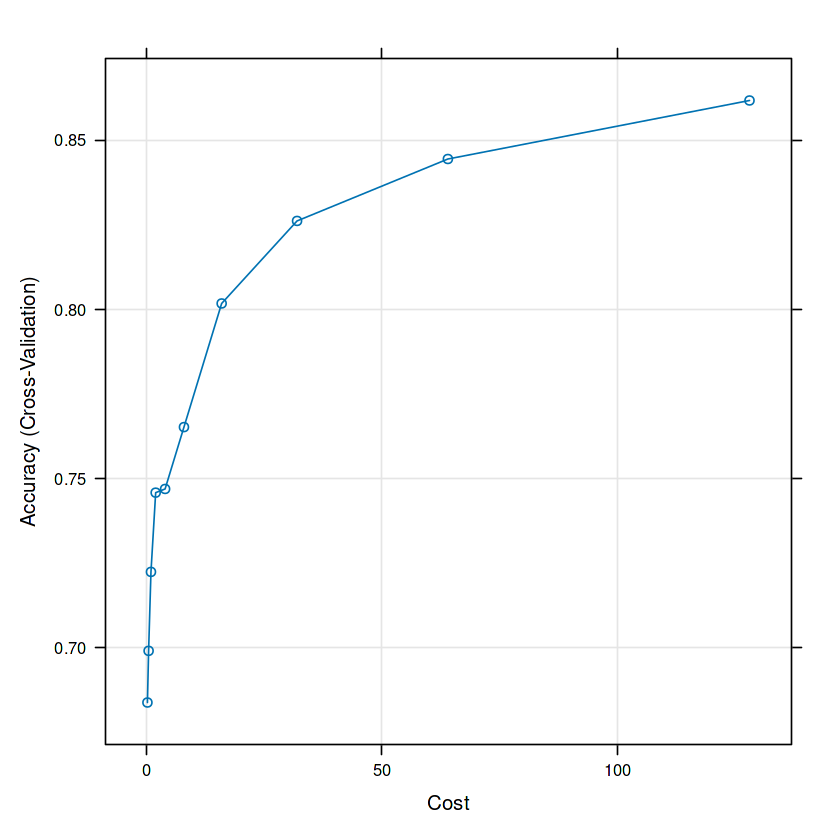

Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction   No  Yes
       No  38.7  2.9
       Yes 10.9 47.5
                            
 Accuracy (average) : 0.8618


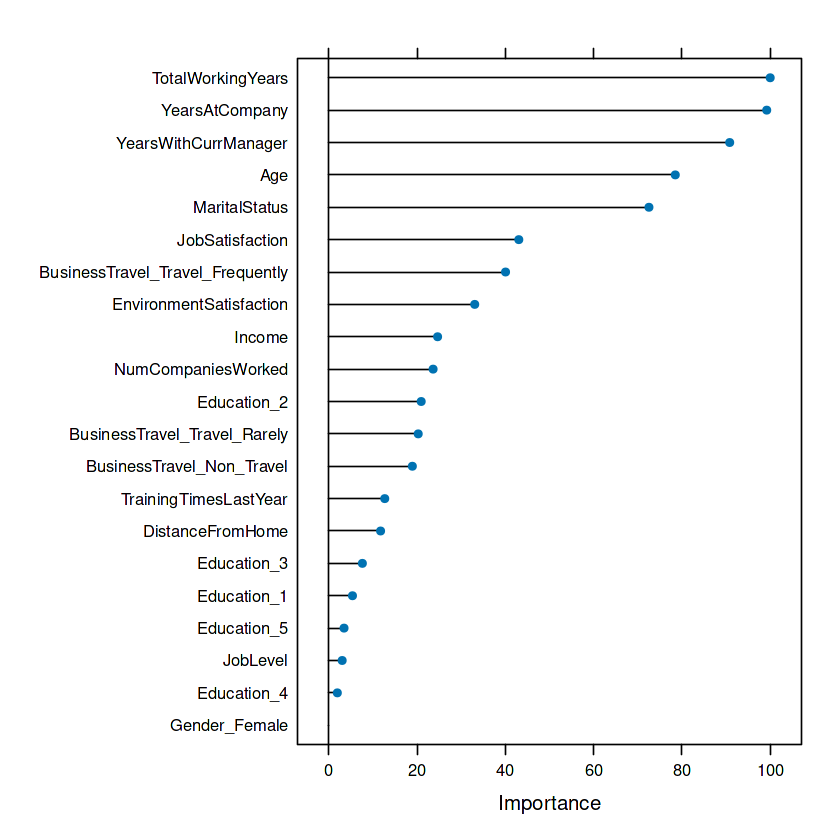

In [13]:
#USING CARET PACKAGE STEPS#
#We do not have to change our target variable from binary to "yes" or "no" because our target variable is already in that format

# We can set our cross validation parameters using trainControl()
# Specify 10-fold cross validation
# classProbs=T makes sure probabilities are also calculated and can be accessed later
ctrl = trainControl(method = "cv", number = 10, classProbs = TRUE)



# train() is a general function from caret package that can handle many methods
# Here we're using "svmRadial" based on the CV parameters that we set earlier
# Other methods are "svmLinear" and "svmPoly"
# By setting tuneLength=10, the function tests 10 different value of C


library(kernlab)

set.seed(123)
SVMR_caret = train(Attrition ~ .,
                   data = train_employee,
                   method = "svmRadial",
                   trControl = ctrl,
                   preProcess = c("center", "scale"),
                   tuneLength = 10)

#Now we plot them and THEY LOOK PRETTY GOOD SO HOPEFULLY ITS RIGHT
SVMR_caret
plot(SVMR_caret)
plot(varImp(SVMR_caret))


#To get the predicted class/category for each data in test
#Note: When using the train() function from "caret" package, the model automatically chooses the best value of k to use in prediction
SVMR_pred2 = predict(SVMR_caret, test_employee[ , -2], type = "raw") #Why is is [ , -2] this time instead of [-2]???


#To get the predicted probability of belonging to each class/category
SVMR_prob2 = predict(SVMR_caret, test_employee[,-2], type="prob")[,2] #Why using 2 at the end of this code???

confusionMatrix(data = SVMR_caret,
                reference = test_employee$Attrition,
                positive = "Yes")

Setting levels: control = No, case = Yes

Setting direction: controls < cases

Setting levels: control = No, case = Yes

Setting direction: controls < cases

Setting levels: control = No, case = Yes

Setting direction: controls < cases



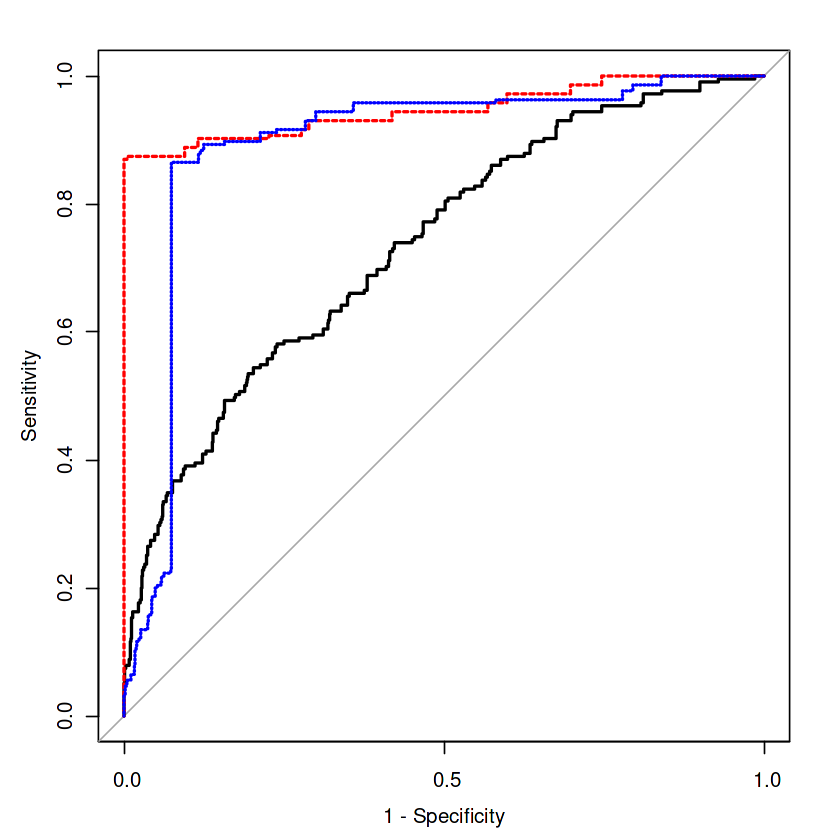

In [14]:
#COMPARING EACH MODEL USING A GRAPH#
#Using plot.roc() and auc() functions from "pROC" package:
#Plot the ROC curve for each SVM_prob model that we made using the different techniques

plot.roc(test_employee$Attrition, SVM_prob, legacy.axes = TRUE)
plot.roc(test_employee$Attrition, SVMR_prob, add = TRUE, col = "red", lty = 2, legacy.axes = TRUE)
plot.roc(test_employee$Attrition, SVMR_prob2, add = TRUE, col = "blue", lty = 3)
legend("bottomright", legend = c("SVM (Linear)", "SVM (Radial) - e1071", "SVM (Radial) - Caret"),
       col = c("black", "red", "blue"), lty = c(1, 2, 3), cex = 0.75)